# Imports

In [1]:
import sklearn
import pandas as pd
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df["Age"] = df["Age"].round()
df["Age"] = df["Age"].fillna(df["Age"].median())

df["Fare"] = df["Fare"].fillna(df["Fare"].mode())

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df["Cabin"] = df["Cabin"].fillna(df["Cabin"].fillna("Unknown"))
df["Cabin"] = df["Cabin"].str[0]

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["Alone"] = (df["FamilySize"] == 1).astype(int)

In [5]:
cat_cols = ['Sex', 'Cabin', 'Embarked']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))

df_encoded = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)

In [6]:
df_train ,df_test = split(df_encoded,test_size=0.2, shuffle=True, random_state=42)

In [7]:
y = df_encoded["Survived"]
x = df_encoded.drop(columns =["Survived"])
print(df_encoded.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'FamilySize', 'Alone', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [8]:
df_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
x_train , x_test, y_train, y_test = split(x, y, test_size=0.2, shuffle=True, random_state = 11)

In [10]:
train_collumns = ["Age","FamilySize","Alone", "Fare", "Sex_female","Parch", "Sex_male",'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [11]:
label_collumn="Survived"

In [12]:
x_train = df_train[train_collumns]
y_train = df_train[label_collumn] 

In [13]:
x_test = df_test[train_collumns]
y_test = df_test[label_collumn] 

In [14]:
model=SVC()

In [15]:
model.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [16]:
predictions=model.predict(x_test)

In [17]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179



In [18]:
confusion_matrix(y_test, predictions)

array([[99,  6],
       [55, 19]])

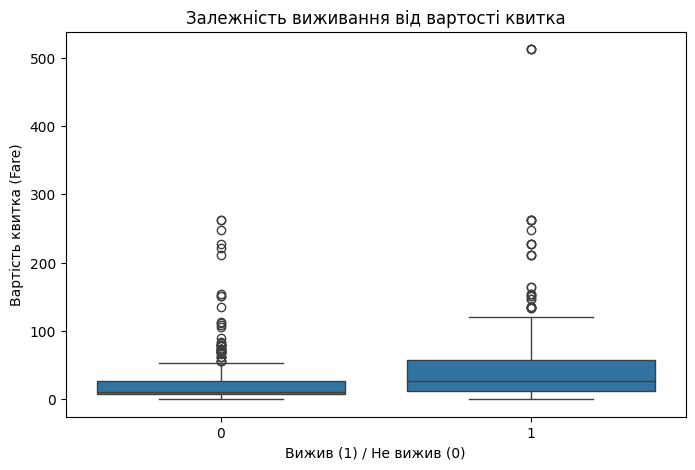

In [19]:
plt.figure(figsize=(8, 5))
sn.boxplot(x='Survived', y='Fare', data=df_encoded)

plt.title('Залежність виживання від вартості квитка')
plt.xlabel('Вижив (1) / Не вижив (0)')
plt.ylabel('Вартість квитка (Fare)')
plt.show()